In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_profiling
import time

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32, label='target'):
  dataframe = dataframe.copy()
  labels = dataframe.pop(label)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [4]:
data = data.fillna(data.mean())
data = data.dropna()

data.drop_duplicates(inplace = True)

In [5]:
data = data.drop('veil-type',1)

In [6]:
data['class'] = np.where(data['class'] == 'p', 0, 1)

In [7]:
features = {}

features[2] = list(data.drop('class', axis=1).columns)
features[0] = [f for f in features[2] if f not in ['stalk-shape', 'ring-number', 'stalk-root', 'veil-color', 'gill-attachment', 'habitat', 'stalk-color-below-ring', 'stalk-color-above-ring', 'cap-surface', 'cap-shape', 'cap-color']]
features[1] = [f for f in features[2] if f not in ['stalk-shape', 'ring-number', 'stalk-root', 'veil-color', 'gill-attachment']]

In [8]:
features

{2: ['cap-shape',
  'cap-surface',
  'cap-color',
  'bruises',
  'odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-shape',
  'stalk-root',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'veil-color',
  'ring-number',
  'ring-type',
  'spore-print-color',
  'population',
  'habitat'],
 0: ['bruises',
  'odor',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'ring-type',
  'spore-print-color',
  'population'],
 1: ['cap-shape',
  'cap-surface',
  'cap-color',
  'bruises',
  'odor',
  'gill-spacing',
  'gill-size',
  'gill-color',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'ring-type',
  'spore-print-color',
  'population',
  'habitat']}

In [9]:
def encode_column(data, column):
    encoded_columns = pd.get_dummies(data[column], prefix=column)
    return pd.concat([data, encoded_columns], axis=1).drop(column, axis=1)

In [10]:
records = []

In [11]:
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.process_time()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch,time.process_time() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        plt.show()
        
        records.append([self.times[-1][1], logs['accuracy']])

1624 train examples
6500 test examples
Train size:  0.2 Features version:  0
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


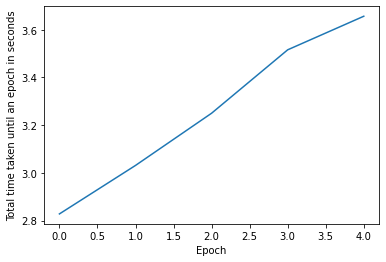

Consider rewriting this model with the Functional API.
204/204 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9977
Train size:  0.2 Features version:  1
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


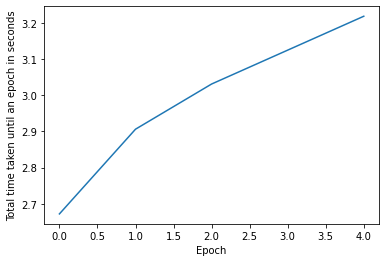

Consider rewriting this model with the Functional API.
204/204 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9977
Train size:  0.2 Features version:  2
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


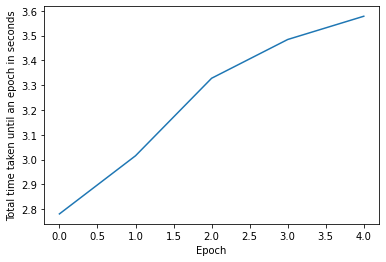

Consider rewriting this model with the Functional API.
204/204 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9977
4062 train examples
4062 test examples
Train size:  0.5 Features version:  0
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


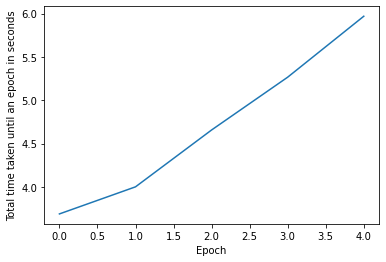

Consider rewriting this model with the Functional API.
127/127 [==============================] - 0s 1ms/step - loss: 3.5133e-04 - accuracy: 1.0000
Train size:  0.5 Features version:  1
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


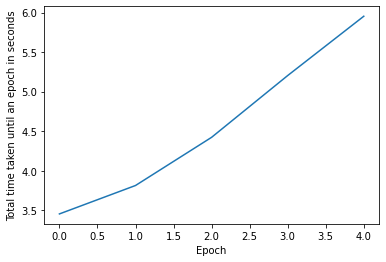

Consider rewriting this model with the Functional API.
127/127 [==============================] - 0s 1ms/step - loss: 3.2341e-04 - accuracy: 1.0000
Train size:  0.5 Features version:  2
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


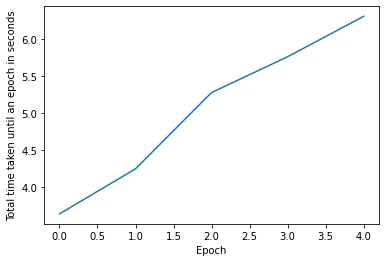

Consider rewriting this model with the Functional API.
127/127 [==============================] - 0s 1ms/step - loss: 2.1635e-04 - accuracy: 1.0000
6499 train examples
1625 test examples
Train size:  0.8 Features version:  0
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


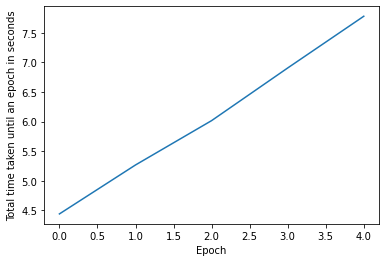

Consider rewriting this model with the Functional API.
51/51 [==============================] - 0s 1ms/step - loss: 1.0322e-04 - accuracy: 1.0000
Train size:  0.8 Features version:  1
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


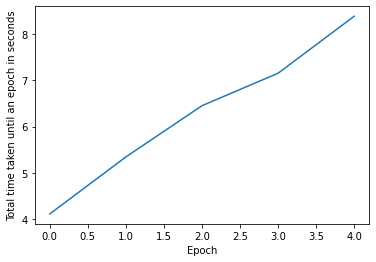

Consider rewriting this model with the Functional API.
51/51 [==============================] - 0s 2ms/step - loss: 8.9790e-05 - accuracy: 1.0000
Train size:  0.8 Features version:  2
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


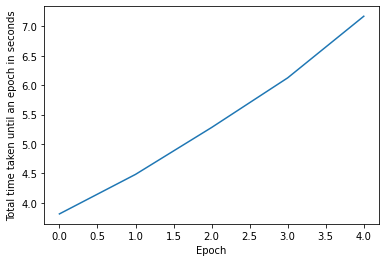

Consider rewriting this model with the Functional API.
51/51 [==============================] - 0s 1ms/step - loss: 8.4133e-05 - accuracy: 1.0000


In [12]:
for train_size in [0.2, 0.5, 0.8]:

    train, test = train_test_split(data, test_size=1 - train_size)
    print(len(train), 'train examples')
    print(len(test), 'test examples')

    batch_size = 32
    train_ds = df_to_dataset(train, batch_size=batch_size, label='class')
    test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size, label='class')
    
    for features_version in [0, 1, 2]:
        
        print("Train size: ", train_size, "Features version: ", features_version)

        feature_columns = []

        numeric_cols = data[features[features_version]].select_dtypes(include=np.number).columns.tolist()

        # numeric cols
        for header in numeric_cols:
            feature_columns.append(feature_column.numeric_column(header))

        # embedding cols
        for header in ['bruises', 'odor', 'gill-spacing', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'spore-print-color','population']:
            if(header not in features[features_version]):
                continue
                
            col = feature_column.categorical_column_with_vocabulary_list(
                  header, data[header].unique())
            embedding = feature_column.embedding_column(col, dimension=8)
            feature_columns.append(embedding)

        feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

        model = tf.keras.Sequential([
          feature_layer,
          layers.Dense(128, activation='relu'),
          layers.Dense(128, activation='relu'),
          layers.Dropout(.1),
          layers.Dense(1)
        ])

        model.compile(optimizer='adam',
                      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        timetaken = timecallback()
        
        model.fit(train_ds, epochs=5, callbacks=[timetaken], verbose=0)
        
        _, test_accuracy = model.evaluate(test_ds)
        records[-1].append(test_accuracy)

In [21]:
results = []
i = 0
for train_size in [0.2, 0.5, 0.8]:
    for features_version in [0, 1, 2]:
        results.append({
            'split': train_size, 
            'features': features_version,
            'time': round(records[i][0], 3) ,
            'train_acc': round(records[i][1], 3),
            'test_acc': round(records[i][2], 3)
        })
        
        i = i+1

In [22]:
results_df = pd.DataFrame(results)
results_df

,split,features,time,train_acc,test_acc
0,0.2,0,3.656,0.999,0.998
1,0.2,1,3.219,0.999,0.998
2,0.2,2,3.578,0.998,0.998
3,0.5,0,5.969,1.000,1.000
4,0.5,1,5.953,1.000,1.000
5,0.5,2,6.312,1.000,1.000
6,0.8,0,7.781,1.000,1.000
7,0.8,1,8.391,1.000,1.000
8,0.8,2,7.172,1.000,1.000


In [23]:
results_df.to_csv('NN-Mushrooms.csv')
print(results_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  split &  features &   time &  train\_acc &  test\_acc \\
\midrule
0 &    0.2 &         0 &  3.656 &      0.999 &     0.998 \\
1 &    0.2 &         1 &  3.219 &      0.999 &     0.998 \\
2 &    0.2 &         2 &  3.578 &      0.998 &     0.998 \\
3 &    0.5 &         0 &  5.969 &      1.000 &     1.000 \\
4 &    0.5 &         1 &  5.953 &      1.000 &     1.000 \\
5 &    0.5 &         2 &  6.312 &      1.000 &     1.000 \\
6 &    0.8 &         0 &  7.781 &      1.000 &     1.000 \\
7 &    0.8 &         1 &  8.391 &      1.000 &     1.000 \\
8 &    0.8 &         2 &  7.172 &      1.000 &     1.000 \\
\bottomrule
\end{tabular}

